<a href="https://colab.research.google.com/github/RJbalikian/SPRIT-HVSR/blob/main/SPRIT_EXAMPLE_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SpRIT HVSR Data Processing Examples

> Google Colab is a relatively simple way to run python packages without having to install and set up python locally on your system. It is not required to run SpRIT, which can run just about any system that can run python.

If you are using Google colab, you can upload this notebook, or copy and paste the content of the code cells.

The sprit package can be used in jupyter notebooks to effectively run data. However, if you are using Google Colab, all of the data is saved on the 'virtual' google computer you are using, so you will need to make sure to download or otherwise save any data you want to keep whenever using Google Colab.

By default, Google Colab has python and most of the python dependencies already installed. However, it does not have the main seismic package that sprit uses in the background (obspy) installed. So, when you tell Google colab to install sprit, it will also install obspy and any other dependencies it does not already have installed. You must do this before running any subsequent cells. This only needs to be done once per Google Colab session.

The first thing we do is install sprit using the `!pip install sprit --upgrade` command (the exclamation point at the start indicates that this is a terminal command, and the --upgrade flag ensures you have the most recent version). You can also use `uv`, which is a more sophisticated package manager than pip. Below is an example of how you would do that with `uv` in a jupyter notebook.

The exclamation points (`!`) tell the jupyter notebook to run a terminal command and not a python command.

In [1]:
# If using Google colab, it is better to use uv to install sprit so you do not get a kernel error (this also works on other systems too, and is recommended).
# If you are using GitHub Codespaces (or having issues with installation because of pycairo), uncomment the following two lines and add --system after --upgrade:
#!sudo apt update -y
#!sudo apt install libcairo-dev -y

!pip install uv
!uv pip install sprit --upgrade #--system # Uncomment "--system" on Github Codespaces

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.1/22.1 MB 41.4 MB/s eta 0:00:00
Using Python 3.12.12 environment at: /usr
Resolved 112 packages in 1.12s
Prepared 52 packages in 12.06s
Uninstalled 22 packages in 1.20s
Installed 52 packages in 233ms
 - altair==5.5.0
 + altair==6.0.0
 + arabic-reshaper==3.0.0
 + asn1crypto==1.5.1
 + asttokens==3.0.1
 + choreographer==1.2.1
 + comm==0.2.3
 - cryptography==43.0.3
 + cryptography==46.0.3
 + cssselect2==0.8.0
 - decorator==4.4.2
 + decorator==5.2.1
 + executing==2.2.1
 + freetype-py==2.5.1
 - ipython==7.34.0
 + ipython==9.8.0
 + ipython-pygments-lexers==1.1.1
 - ipywidgets==7.7.1
 + ipywidgets==8.1.8
 + jedi==0.19.2
 + kaleido==1.2.0
 + logistro==2.0.1
 - matplotlib==3.10.0
 + matplotlib==3.10.7
 - numpy==2.0.2
 + numpy==2.3.5
 + obspy==1.4.2
 - orjson==3.11.4
 + orjson==3.11.5
 + oscrypto==1.3.0
 - pandas==2.2.2
 + pandas==2.3.3
 - pillow==11.3.0
 + pillow==12.0.0
 - plotly==5.24.1
 + plotly==6.5.0
 - protobuf==5.29.5
 + protobuf==6.33.2
 + p

# Basic processing using sample data

Let' s practice the very basics of processing data in sprit using the sample data. Run the following cell (it takes about less than 30 seconds to run after the kernel loads). When nothing is specified for the `input_data` parameter, it will run a sample dataset.

In [ ]:
import sprit
hvsrData = sprit.run()

# Verbose outputs

To see better what is going on "under the hood", you can add verbose outputs that will print the inputs and outputs along the way. Note we are using a different sample dataset in this cell than the previous. There are 10 sample datasets.

In [ ]:
import sprit
hvsrData = sprit.run(input_data="sample2", verbose=True)

# Adding metadata to your data

HVSR measurements will involve not just seismic data, but also metadata like geospatial coordinates, elevation, site name, project name, etc. (this is in addition to instrument response metadata that may be used to remove instrument response from your seismic data). If you are planning to post-process the data to create depth/elevation curves or HVSR transects, it is recommended to include coordinates and elevations so it is included in the .hvsr file or the `HVSRData` object you can use for post-processing. By default, SpRIT does not remove instrument response. Depending on the seismometer, removing response or not removing response often ends up with very similar HVSR results since a) geophones tend to be similar or the same in the same instrument and b) we are only interested in the ratio in a certain bandwidth.

Adding metdata is relatively simple when you have a single seismic file for your site containing data from all three components (this includes data acquired using the [Raspberry Shake HVSR script](https://github.com/RJbalikian/SPRIT-HVSR/tree/main/sprit/resources/hvsrscripts) and data from supported Tromino instruments). When the data is formatted this way, the network, station, channels, location, acquisition date, starttime, and endtime will all be read from the data for you. If the data is in a more "raw" format, you may have to specify some of this yourself.

See the example below for processing this kind of file (we will use a sample file that is structured in this way).

> Note: you can find the EPSG codes for various coordinate systems at [esgp.io](https://epsg.io/). This can be entered as an integer or a string for the value of the `input_crs` parameter (and/or the `output_crs` parameter).

In [ ]:
import sprit
hvsrData = sprit.run(input_data='sample3', # This would be the filepath to your data, or an obspy Stream object with the 3-component data
                     project='Example Project', # This could be a project name, county, or any other way you organize your data
                     site="Single HVSR Site 1", #
                     xcoord=-88.20014, # longitude in WGS84 (default). If you use another CRS, specify input_crs=<epsg code> (e.g., 6345 is an EPSG code for UTM Zone 16)
                     ycoord=39.6462, # latitude of measurement
                     #input_crs=4326, # Because we are using WGS84 lat/lon, we can leave this line commented out. If using another CRS, replace 4326 with the EPSG code of that CRS
                     elevation=207.31, # This is surface elevation in meters. if you use feet, you should also specify, elev_unit='ft' as a parameter
                     #elev_unit='m' # Elevation in meters is the default. If you specify elevation in feet, specify elev_unit='ft' and it will transform it to meters
                     )

# Editing and Excluding Data

There are two primary ways of editing and refining data with SpRIT: a) exclude data based on characteristics of the raw seismic data stream, or b) exclude data based on statistical characteristics of the PSD or HVSR curves generated during processing.

The first type of editing is carried out by the optional `remove_noise()` function. This is not called by `sprit.run()` by default unless the `noise_removal` parameter is set to `True` or a parameter from the `remove_noise()` function is passed to the `sprit.run()` function.

The same is generally true of the second type of data exclusion (curve-based). This type of data exclusion is carried out by the `remove_outlier_curves()` function. This is also not called by `sprit.run()` by default unless the `outlier_curves_removal` parameter is set to `True` or if a parameter of the `remove_outlier_curves()` function is passe to the `sprit.run()` function.

For more information on the options available for data editing and exclusion, see the API Reference for [`remove_noise()`](https://rjbalikian.github.io/SPRIT-HVSR/main.html#sprit.remove_noise) and [`remove_outlier_curves()`](https://rjbalikian.github.io/SPRIT-HVSR/main.html#sprit.remove_outlier_curves). The manual removal methods (i.e., using an interactive charts) only work in limited processing environments.

Below is an example of data exclusion. Note that the `peak_freq_range` parameter is actually a part of the `check_peaks()` function, and is used to limit the frequency band within which SpRIT will search for peaks.

Times where data is excluded from H/V analysis is shown via black bars on the bottom chart in the default layout of the Plot Report.

In [ ]:
import sprit
hvsrData = sprit.run('sample8',
                     peak_freq_range=[2, 20], # Limit searching for peaks between 2 Hz and 20 Hz
                    # Comment this ^ line out to see what can happen in some datasets if you do not limit the peak search (it by default picks largest curve value as peak)

                     # These are parameters that can be called to exclude data based on raw data stream
                     std_ratio_thresh=1, # Ratio of Moving standard deviation / Total standard deviation of data (default value is slightly higher to not remove too much data)
                     warmup_time=120, # Excludes the initial 120 seconds of the record from analysis (cooldown_time excludes the final  x seconds)
                     #remove_method='auto', # auto will do the moving standard deviation and saturation threshold with default values

                     # These are parameters that can be called to exclude data based on curve statistics
                     outlier_threshold=90, # This keeps 90 percent of curves, based on whose "distance" from a prototype curve (the median at each frequency) are smallest
                     )

# Reading Tromino Data
There is experimental support for Tromino data in the SpRIT module from the Tromino Yellow (3G and 3G+) and Tromino Blue models. If there is interest in other models, please use the [Issues tab](https://github.com/RJbalikian/SPRIT-HVSR/issues) of the main GitHub repository. This requires you to first read the Tromino data into your GRILLA Database. The `input_data` parameter should point to the appropriate .trc file and the `tromino_model` parameter should be something like "Yellow", "Blue", or similar.

In [ ]:
import sprit
obspyStreamObject = sprit.read_tromino_files(input_data="/path/to/your/GrillaDB/Traces/ProjectName/PartitionFolder/GRILLAxx.trc")

# You can use this Stream object in sprit.run()
hvsrData = sprit.run(input_data=obspyStreamObject)

Alternatively, you could read the data directly into `sprit.run()` and indicate you are reading data from a Tromino Instrument. If the file is a .trc file, it will then run the `read_tromino_files` function internally while processing.

In [ ]:
import sprit
hvsrData = sprit.run(input_data="/path/to/your/GrillaDB/Traces/ProjectName/PartitionFolder/GRILLAxx.trc",
                     instrument='Tromino Yellow')

# Report formats

It may be helpful to see your data in various formats. Up until now, we have only generated a print report. However, plots and csv files may also be useful as outputs, and the data itself may be useful to save and use for later. For this, we will need to specify what kinds of reports to output and where to output them.

For the report_format parameter, we will pass a list of formats. It will generate each of those included in the list ('print', 'plot', and 'csv' are currently the only supported formats). Specifying True for the export_path parameter tells sprit to first try to save the data in the same directory as the input data. Since this is sample data, we do not want to save data in the package itself, so in this case, it will then try to save data in the current working directory. If that is also in a place where it cannot or should not save, it will then save to the home directory.

In Google colab, it will save to the main directory "/content".

In addition to saving the reports, whenever report_export_path is designated (either as True or as a filepath), it will also save a "pickled" version of your data object itself as a .hvsr file.

After running the cell below, you should see a printed text report, have a matplotlib plot (specify plot_engine='plotly' to get a plot using plotly), a tabular output of your data and whether it passed the tests (this is a pandas DataFrame), and a .hvsr file which is a copy of the hvsrData variable in a file format.

In [ ]:
import sprit
import pathlib
current_working_directory = pathlib.Path().cwd() # This sets a variable as the current working directory

hvsrData = sprit.run("sample",
                     report_formats=['print', 'plot', 'table'],      # This tells SpRIT which reports to generate
                     report_export_format=['print', 'plot', 'table', 'html', 'pdf'], # This tells SpRIT which reports to export (they will also be saved to data object when exported)
                     report_export_path=current_working_directory)   # This tells SpRIT where to export the reports

# Jupyter GUI

The simplest way to use the Jupyter Graphical User Interface is shown below:

In [ ]:
import sprit
sprit.gui(kind='notebook')

> NOTE: Google Colab blocks "third-party" widgets, so this will likely not work (at least with plot visualizations) in Google Colab. It does seem to work fine in GitHub Codespaces

## Jupyter GUI in Google Colab

Open notebook in playground mode first, then run the next cells (File > Open in playground mode)

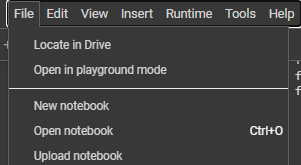

In [ ]:
import sprit
from google.colab import output
output.disable_custom_widget_manager()
sprit.gui('nb')

# Command line interface

Jupyter notebooks can also run terminal commands. To do this, preface your command with ! (there are also ["magic" text](https://ipython.readthedocs.io/en/stable/interactive/magics.html) commands that can be specified).

For us, we can run the command line of sprit as well from jupyter notebooks. Here is an example of the same output as the above command, only carried out using command line. (note that there are no spaces between the list of report formats).

The following should run the same code as the code cell from the Report Formats section

> NOTE: There are no spaces in the between before/after the commas when using the command line interface!!!

In [ ]:
!sprit "sample2" --report_formats 'print','plot','table' --report_export_format 'print','plot','table','html','pdf'

# Export and Import

Data can be exported to .json and imported again into SpRIT. Imports are not fully supported yet (importing a json file currently creates an HVSRData object, but which is only partially compatible with SpRIT functions and methods (to be improved in the future)). This JSON file is also importable into most programs that support JSON files.

In this first example, the JSON output is saved as a string to the `hvsrJSON` variable (no filepath is specified in the `to_json()` method, rather than to a JSON file on disk. This can also be re-built into a SpRIT HVSRData object, but may not be as useful as saving to disk.

In [ ]:
import sprit
hvsrData = sprit.run(suppress_report_outputs=True)
hvsrJSON = hvsrData.to_json()
hvsrJSON

************************************** PROCESSING SAMPLE DATA *************************************
*      To read in your own data, use sprit.run(input_data='/path/to/your/seismic/data.mseed')     *
*              Any file format supported by osbpy.read() can be input to sprit_run()              *
*              Raw data (.trc) files from select Tromino Portable are also supported              *
*                    See SpRIT Wiki or API documentation for more information:                    *
*                       Wiki: https://github.com/RJbalikian/SPRIT-HVSR/wiki                       *
*                   API Documentation: https://sprit.readthedocs.io/en/latest/#                   *
***************************************************************************************************

USING SAMPLE DATASET


———————————————————————————————————————————————————————————————————————————————————————————————————
=                                           SampleData00                    

# Batch processing

Data can be processed in batch using sprit. Let's practice this with the six sample datasets provided. Setting verbose=True will allow us to see the progress as well as a printed version of the input csv file. Note that some of the inputs have been left blank in the input csv file. Default values are used in this instance. This usually takes at least 45 seconds to process.

In [ ]:
import sprit
hvsrBatch = sprit.run("sample", source='batch')

In post=processing, it can also be helpful to read in a series of .hvsr files as an `HVSRBatch` data object.

This can be done by creating an instace of the `HVSRBatch` directly. There are many ways to do this, but creating a dictionary is one relatively simple way

In [ ]:
import sprit

# Import sample .hvsr datasets to a dictionary with the site name specified as the key and the HVSRData object as the value
batchDict = {"SampleHVSRData1":sprit.import_data('sample', show_data=False),
             "SampleHVSRData2":sprit.import_data('sample2', show_data=False)}

# Initialize HVSRBatch object
hvBatch = sprit.HVSRBatch(batchDict)

# And double check to make sure we have what we want (note that the locations of these sample datasets are not )
for site in hvBatch:
    print(site, hvBatch[site].hvsr_id)